In [1]:
# Importing Libraries

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.shape

(8523, 12)

In [5]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train.Item_Weight.nunique()

415

In [7]:
train.Outlet_Size.nunique()

3

In [8]:
train.duplicated().sum()

0

In [9]:
# # checking outliers

# def boxplots(data):
#     for feature in data.columns:
#         plt.figure(figsize=(10,1))
#         if data[feature].dtype !='object':
#             sns.boxplot(data[feature],data=data)
#             plt.show()
#         else:
#             print(feature,'is an object')
#             plt.show()

In [10]:
# boxplots(train)

<AxesSubplot:xlabel='Item_Visibility'>

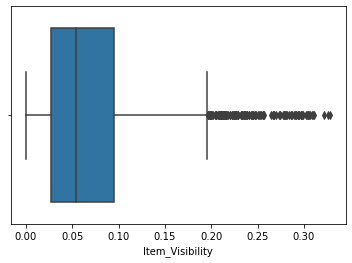

In [11]:
sns.boxplot(train['Item_Visibility'],data=train)

In [12]:
# HAndling missing values

In [13]:
def impute_nan(data,column,median):
    data[column+"_random"]=data[column]
    random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
    random_sample.index=data[data[column].isnull()].index
    data.loc[data[column].isnull(),column+'_random']=random_sample
    data[column]=data[column+"_random"]
    data.drop([column+"_random"],axis=1,inplace=True)


In [14]:
impute_nan(train,column=("Item_Weight"),median=0)


In [15]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
train["Outlet_Size"]=train["Outlet_Size"].fillna("Others")


In [18]:
train.Outlet_Size.value_counts()

Medium    2793
Others    2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
# plots

In [21]:
# Handling Outliers
    # Item_Visibility
    # Item_Outlet_Sales

In [22]:
pd.set_option('display.max_rows',500)


In [23]:
# dealing repeated categories

train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
train.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
train.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
train.Item_Fat_Content.replace('reg','Regular',inplace=True)


train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
# dealing 0 in item visibility

train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [26]:
mean = train['Item_Visibility'].mean()


In [27]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,mean)

In [28]:
train.Item_Visibility.value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
objcol =  train.select_dtypes(include=np.object_).columns
numericalCol =  train.select_dtypes(include=np.number).columns

In [31]:
# pairwise plotting for numerical 
# j=1
# plt.figure(figsize=(30,20))
# for column in numericalCol:
#     plt.subplot(4,2,j)
#     plt.scatter(train[column],train['Item_Outlet_Sales'])
#     plt.xlabel(column)
#     plt.ylabel('Item_Outlet_Sales')    
#     j+=1


In [32]:
discreteCols=[]
contcols=[]

for column in numericalCol:
     if train[column].nunique()>10:
        contcols.append(column)
     else:
        discreteCols.append(column)

In [33]:
discreteCols

['Outlet_Establishment_Year']

In [34]:
contcols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

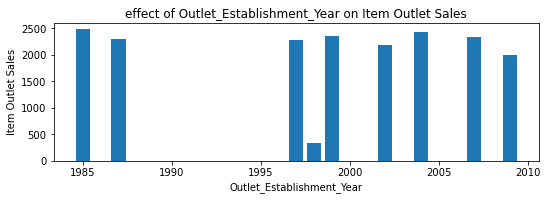

In [35]:
# pairwise for discrete columns

j=1
plt.figure(figsize=(40,30))
for column in discreteCols:
    plt.subplot(10,4,j)
    observationVal = train.groupby(column)['Item_Outlet_Sales'].mean()
    observationValDF = pd.DataFrame(observationVal).sort_values(by='Item_Outlet_Sales',ascending =False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['Item_Outlet_Sales'])
    plt.title(f'effect of {column} on Item Outlet Sales')
    plt.xlabel(column)
    plt.ylabel('Item Outlet Sales')    
    j+=1


In [36]:
observationValDF

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
1,2004,2438.841866
2,1999,2348.354635
3,2007,2340.675263
4,1987,2298.995256
5,1997,2277.844267
6,2002,2192.384798
7,2009,1995.498739
8,1998,339.351662


In [37]:
# j=1
# plt.figure(figsize=(20,10))
# for column in objcol:
#     plt.subplot(3,3,j)
#     observationVal = train.groupby(column)['Item_Outlet_Sales'].mean()
#     observationValDF = pd.DataFrame(observationVal).sort_values(by='Item_Outlet_Sales',ascending =False)
#     observationValDF.reset_index(inplace=True)
#     plt.bar(observationValDF[column],observationValDF['Item_Outlet_Sales'])
#     plt.title(f'effect of {column} on Item_Outlet_Sales')
#     plt.xlabel(column)
#     plt.ylabel('Item_Outlet_Sales')    
    # j+=1


In [38]:
train.Item_Identifier.nunique()

1559

In [39]:
# Handling Outliers 
# 		Approach 1 : Outlier Detection with Standard Deviation

    # Item_Visibility
    # Item_Outlet_Sales

    
for column in contcols:
    upper_limit = train[column].mean()+train[column].std()*3
    lower_limit = train[column].mean()-train[column].std()*3
    
    # Capping
    train.loc[train[column]>upper_limit,column] = upper_limit
    train.loc[train[column]<lower_limit,column] = lower_limit




In [40]:
(train[column]>upper_limit).sum()

0

In [41]:
# # checking outliers

# def boxplots(data):
#     for feature in data.columns:
#         plt.figure(figsize=(10,1))
#         if data[feature].dtype !='object':
#             sns.boxplot(data[feature],data=data)
#             plt.show()
#         else:
#             print(feature,'is an object')
#             plt.show()

In [42]:
# boxplots(train)

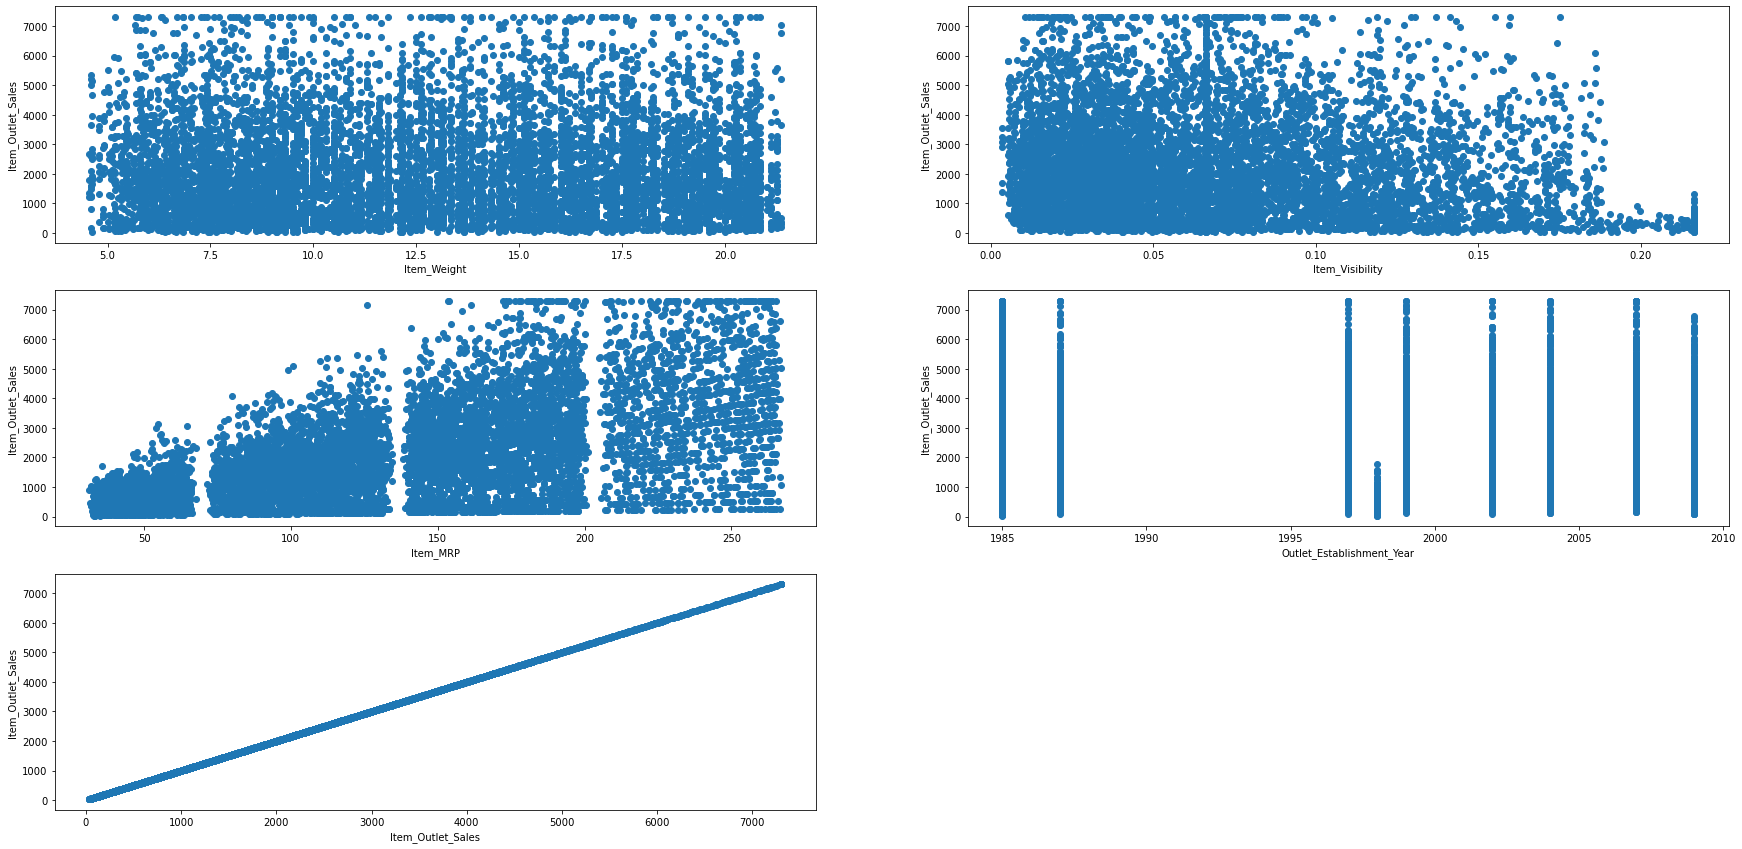

In [43]:
# pairwise plotting for numerical 
j=1
plt.figure(figsize=(30,20))
for column in numericalCol:
    plt.subplot(4,2,j)
    plt.scatter(train[column],train['Item_Outlet_Sales'])
    plt.xlabel(column)
    plt.ylabel('Item_Outlet_Sales')    
    j+=1

In [44]:
objcol

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder


In [46]:
# #  Categorical Encoding :
# #========================================#

# def categorical_encoding(data,columns,targetColumn,encodingType,approach):

#     if encodingType=="NominalEncoding":
#         if "OneHotEncoding" in approach:
#             for column in columns:
#                 data_new = pd.get_dummies(data[column],drop_first=True)
#                 data = pd.concat([data,data_new],axis=1)
#                 data.drop(column,axis=1,inplace=True)
#         if "OneHotEncodingWithManycatergories" in approach:
#             for column in columns:
#                 lst_10=list(data[column].value_counts().sort_values(ascending=False).head(10).index)
#                 for categories in lst_10:
#                     data[categories]=np.where(data[column]==categories,1,0)
#         if "MeanEncoding" in approach:
#             for column in columns:
#                 mean_ordinal=data.groupby([column])[targetColumn].mean().to_dict()
#                 data[column]=data[column].map(mean_ordinal)


#     if encodingType=="OrdinalEncoding":
#         if "LabelEncoding" in approach:
#             le = LabelEncoder()
#             data[columns] = data[columns].apply(le.fit_transform)

#         if "TargetGuidedOrdinalEncoding" in approach:
#             for column in columns:
#                 ordinal_labels=data.groupby([column])[targetColumn].mean().sort_values().index
#                 ordinal_labels={k:i for i,k in enumerate(ordinal_labels)}
#                 data[column] = data[column].map(ordinal_labels)


In [47]:
# def categorical_encoding(train,columns,targetColumn,encodingType,approach):
# # 

In [48]:
train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [49]:
trainObjectDF = train[objcol]
train[objcol]



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Others,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Others,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [50]:
trainObjectDF

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Others,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Others,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [51]:
from collections import defaultdict

defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

fittrainObjectDF



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,2,2,0
4,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1
8519,897,1,0,7,2,1,1
8520,1357,0,8,6,3,1,1
8521,681,1,13,3,1,2,2


In [52]:
train.drop(objcol,axis=1,inplace=True)


In [53]:
updatedtrainDF=pd.concat([train,fittrainObjectDF],axis=1)
updatedtrainDF

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,3735.1380,156,0,4,9,1,0,1
1,5.920,0.019278,48.2692,2009,443.4228,8,1,14,3,1,2,2
2,17.500,0.016760,141.6180,1999,2097.2700,662,0,10,9,1,0,1
3,19.200,0.066132,182.0950,1998,732.3800,1121,1,6,0,2,2,0
4,8.930,0.066132,53.8614,1987,994.7052,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,370,0,13,1,0,2,1
8519,8.380,0.046982,108.1570,2002,549.2850,897,1,0,7,2,1,1
8520,10.600,0.035186,85.1224,2004,1193.1136,1357,0,8,6,3,1,1
8521,7.210,0.145221,103.1332,2009,1845.5976,681,1,13,3,1,2,2


In [54]:
# correlation

corrDF = updatedtrainDF.corr()
corrDF


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.021342,0.021790,-0.000830,0.005731,0.043764,-0.018116,0.031323,-0.007938,-0.004743,-0.002707,-0.012951
Item_Visibility,-0.021342,1.000000,-0.005202,-0.071265,-0.129240,-0.030760,0.052274,-0.036815,-0.101744,0.091843,-0.024512,-0.170181
Item_MRP,0.021790,-0.005202,1.000000,0.005020,0.572033,0.012853,0.006063,0.032651,0.003319,0.005058,0.000232,-0.001975
Outlet_Establishment_Year,-0.000830,-0.071265,0.005020,1.000000,-0.042671,-0.012772,0.003151,0.004970,0.079035,0.268715,-0.089216,-0.122304
Item_Outlet_Sales,0.005731,-0.129240,0.572033,-0.042671,1.000000,0.002839,0.019235,0.017307,0.166349,-0.157943,0.086254,0.400809
Item_Identifier,0.043764,-0.030760,0.012853,-0.012772,0.002839,1.000000,-0.114660,-0.017973,-0.008602,0.001723,0.003656,-0.001178
Item_Fat_Content,-0.018116,0.052274,0.006063,0.003151,0.019235,-0.114660,1.000000,-0.139434,0.000764,-0.001925,-0.001598,0.002199
Item_Type,0.031323,-0.036815,0.032651,0.004970,0.017307,-0.017973,-0.139434,1.000000,0.001656,-0.002390,0.003084,0.003053
Outlet_Identifier,-0.007938,-0.101744,0.003319,0.079035,0.166349,-0.008602,0.000764,0.001656,1.000000,0.341612,-0.716176,0.099873
Outlet_Size,-0.004743,0.091843,0.005058,0.268715,-0.157943,0.001723,-0.001925,-0.002390,0.341612,1.000000,-0.584844,-0.428246


In [55]:
corrCols = corrDF['Item_Outlet_Sales'].abs().sort_values(ascending=False)
corrCols

Item_Outlet_Sales            1.000000
Item_MRP                     0.572033
Outlet_Type                  0.400809
Outlet_Identifier            0.166349
Outlet_Size                  0.157943
Item_Visibility              0.129240
Outlet_Location_Type         0.086254
Outlet_Establishment_Year    0.042671
Item_Fat_Content             0.019235
Item_Type                    0.017307
Item_Weight                  0.005731
Item_Identifier              0.002839
Name: Item_Outlet_Sales, dtype: float64

In [56]:
finalCols = corrCols[corrCols>0.4].index
finalCols

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type'], dtype='object')

In [57]:
updatedtrainDF[finalCols]

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1
...,...,...,...
8518,2778.3834,214.5218,1
8519,549.2850,108.1570,1
8520,1193.1136,85.1224,1
8521,1845.5976,103.1332,2


In [58]:
final_train = updatedtrainDF[finalCols]
final_train

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1
...,...,...,...
8518,2778.3834,214.5218,1
8519,549.2850,108.1570,1
8520,1193.1136,85.1224,1
8521,1845.5976,103.1332,2


In [59]:
# splitting


X =final_train.drop('Item_Outlet_Sales',axis=1)
y =final_train.Item_Outlet_Sales

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)  


In [61]:
#### scaling - train % Test X

from sklearn.preprocessing import StandardScaler

# scaling X using std scalar
sc_X = StandardScaler()


                        # sc_X.fit_transform(X_train)
                        # sc_X.transform(X_test)


X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

In [62]:
#### scaling - train % Test y

from sklearn.preprocessing import StandardScaler

# scaling y using std scalar
sc_y = StandardScaler()


                        # sc_X.fit_transform(X_train)
                        # sc_X.transform(X_test)


y_train = pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test = pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1)))

In [63]:
#Prediction 
from sklearn.linear_model import LinearRegression

#1.fitting

#creating object
lr = LinearRegression()

#train the model using the train set
lr.fit(X_train, y_train)        


LinearRegression()

In [64]:
#2. prediction
y_pred = lr.predict(X_test)

In [65]:
# mse (yactual(test),ypredicted)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)




### note that this is done by scaling only x ,y is not scaled

0.48057474961957103

In [66]:
# train accuracy
 
lr.score(X_train,y_train)

0.4850375646765964

In [67]:
#test accuracy
lr.score(X_test,y_test)

0.4951782520629848

In [68]:
R2_Score = []
adj_R2 = []
features = []

for i in range(1,20):
    features.append(X_train.columns[:i].to_list())
    lr = LinearRegression()
    lr.fit(X_train[X_train.columns[:i]],y_train)
    R2=(lr.score(X_test[X_test.columns[:i]],y_test))
    R2_Score.append(R2)
    n=len(X_train)
    p=i
    aR2 = 1-((1-R2)*(n-1)/(n-p-1))
    adj_R2.append(aR2)

In [69]:
df =  pd.DataFrame(np.column_stack((R2_Score,adj_R2)),columns=['R2','adjR2'])
df['feature Name'] = features
df

,R2,adjR2,feature Name
0,0.321874,0.321756,[Item_MRP]
1,0.495178,0.495001,"[Item_MRP, Outlet_Type]"
2,0.495178,0.494913,"[Item_MRP, Outlet_Type]"
3,0.495178,0.494824,"[Item_MRP, Outlet_Type]"
4,0.495178,0.494736,"[Item_MRP, Outlet_Type]"
5,0.495178,0.494647,"[Item_MRP, Outlet_Type]"
6,0.495178,0.494559,"[Item_MRP, Outlet_Type]"
7,0.495178,0.494470,"[Item_MRP, Outlet_Type]"
8,0.495178,0.494381,"[Item_MRP, Outlet_Type]"
9,0.495178,0.494292,"[Item_MRP, Outlet_Type]"


In [70]:
######################## ?

In [71]:
final_train

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1
...,...,...,...
8518,2778.3834,214.5218,1
8519,549.2850,108.1570,1
8520,1193.1136,85.1224,1
8521,1845.5976,103.1332,2


In [72]:
# sklearn                 - bible of ML 


from sklearn.preprocessing import StandardScaler
     #module  #class               #function


sc = StandardScaler()

sc_df = sc.fit_transform(final_train)                 # scaled df = sc_df

scaled_df = pd.DataFrame(sc_df,columns=final_train.columns)

scaled_df.head()

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,0.942749,1.747454,-0.252658
1,-1.038807,-1.489023,1.002972
2,-0.043219,0.010040,-0.252658
3,-0.864860,0.660050,-1.508289
4,-0.706944,-1.399220,-0.252658


In [73]:
# QQ PLOT


import scipy.stats as stat
import pylab

def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()


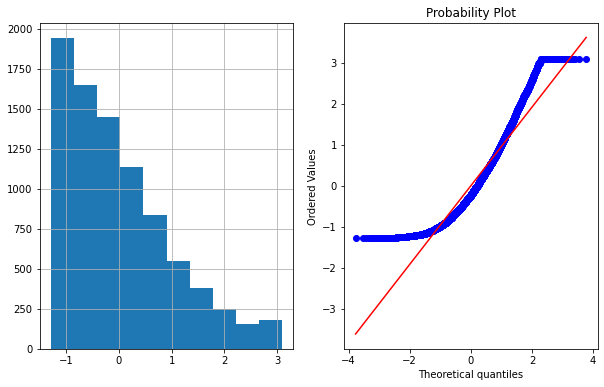

In [74]:
plot_data(scaled_df,'Item_Outlet_Sales')

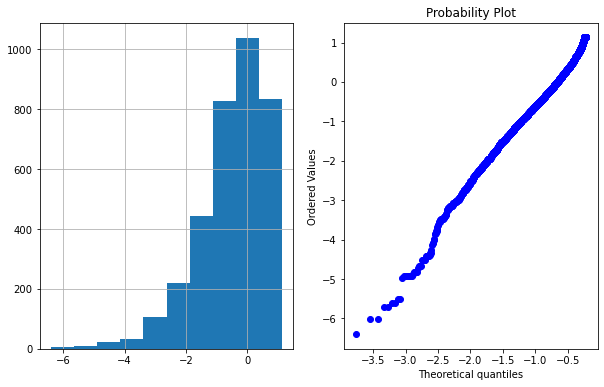

In [75]:
# log transformation

import numpy as np
scaled_df['Item_Outlet_Sales_log']=np.log(scaled_df['Item_Outlet_Sales'])

plot_data(scaled_df,'Item_Outlet_Sales_log') 

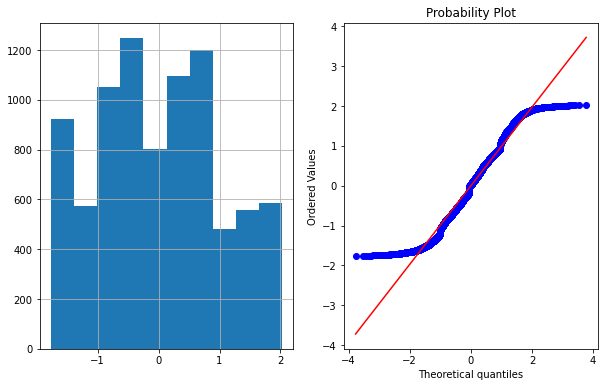

In [76]:
plot_data(scaled_df,'Item_MRP')

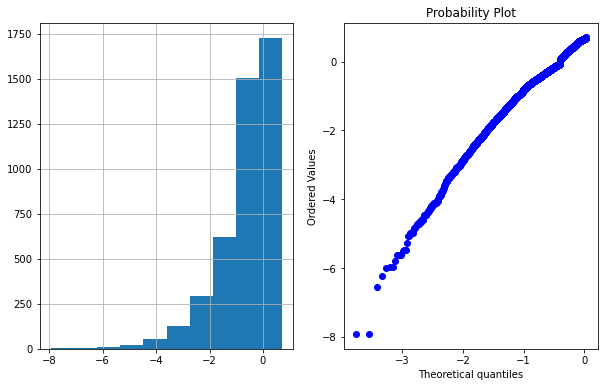

In [77]:
# log transformation

import numpy as np
scaled_df['Item_MRP_log']=np.log(scaled_df['Item_MRP'])

plot_data(scaled_df,'Item_MRP_log') 

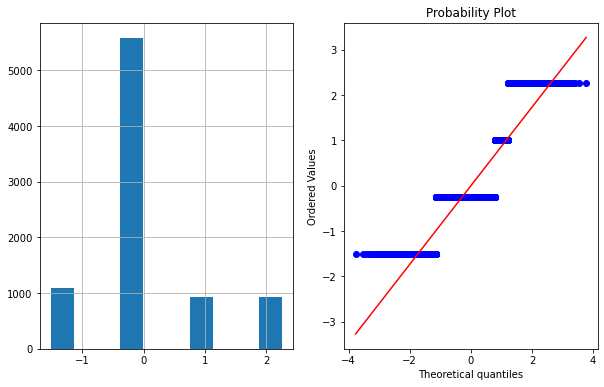

In [78]:
plot_data(scaled_df,'Outlet_Type')

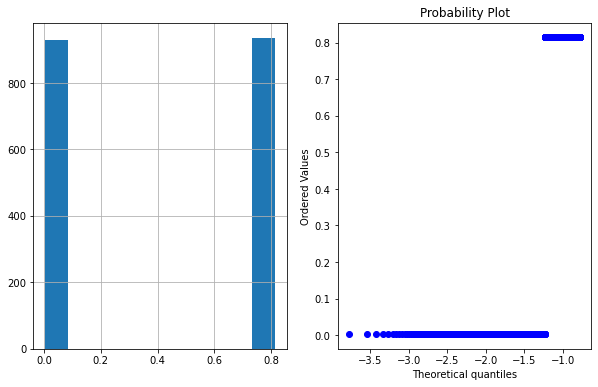

In [79]:
# log transformation

import numpy as np
scaled_df['Outlet_Type_log']=np.log(scaled_df['Outlet_Type'])

plot_data(scaled_df,'Outlet_Type_log') 

In [80]:
scaled_df

,Item_Outlet_Sales,Item_MRP,Outlet_Type,Item_Outlet_Sales_log,Item_MRP_log,Outlet_Type_log
0,0.942749,1.747454,-0.252658,-0.058955,0.558160,NaN
1,-1.038807,-1.489023,1.002972,NaN,NaN,0.002968
2,-0.043219,0.010040,-0.252658,NaN,-4.601157,NaN
3,-0.864860,0.660050,-1.508289,NaN,-0.415440,NaN
4,-0.706944,-1.399220,-0.252658,NaN,NaN,NaN
...,...,...,...,...,...,...
8518,0.366799,1.180783,-0.252658,-1.002940,0.166178,NaN
8519,-0.975080,-0.527301,-0.252658,NaN,NaN,NaN
8520,-0.587506,-0.897208,-0.252658,NaN,NaN,NaN
8521,-0.194722,-0.607977,1.002972,NaN,NaN,0.002968
